# Classification Problem

In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\AFNAN AFSHEEN\\OneDrive\\Desktop\\Python\\dataset\\diabetes.csv")

# EDA(Exploratory Data Analysis)

In [336]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [337]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Visualising the DataSet Spread

<AxesSubplot:ylabel='Age'>

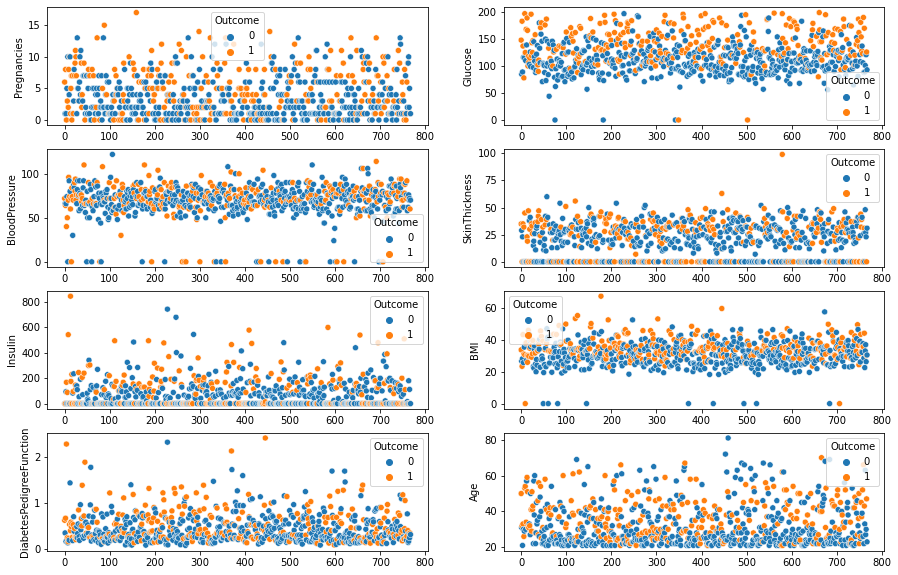

In [338]:
plt.figure(figsize=(15,10))
plt.subplot(4,2,1)
sns.scatterplot(x=df.index,y='Pregnancies',data=df,hue='Outcome')
plt.subplot(4,2,2)
sns.scatterplot(x=df.index,y='Glucose',data=df,hue='Outcome')
plt.subplot(4,2,3)
sns.scatterplot(x=df.index,y='BloodPressure',data=df,hue='Outcome')
plt.subplot(4,2,4)
sns.scatterplot(x=df.index,y='SkinThickness',data=df,hue='Outcome')
plt.subplot(4,2,5)
sns.scatterplot(x=df.index,y='Insulin',data=df,hue='Outcome')
plt.subplot(4,2,6)
sns.scatterplot(x=df.index,y='BMI',data=df,hue='Outcome')
plt.subplot(4,2,7)
sns.scatterplot(x=df.index,y='DiabetesPedigreeFunction',data=df,hue='Outcome')
plt.subplot(4,2,8)
sns.scatterplot(x=df.index,y='Age',data=df,hue='Outcome')

In [339]:
df.shape

(768, 9)

# Model Selection

In [340]:
from sklearn.model_selection import train_test_split

# Preprocession/Scaling the Dataset for Logistic Regression and SVM

In [341]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [342]:
X=df.drop(columns=["Outcome"])
y=df.Outcome

In [343]:
X_scaled=mms.fit_transform(X)

# Since DecisionTree and RandomForest Classifiers dont need the Dataset to be Scaled, We use Scaled X only for Logistic Regression

In [344]:
xtrain_lr,xtest_lr,ytrain_lr,ytest_lr=train_test_split(X_scaled,y,test_size=0.2,random_state=0)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

# Trying Out Different Algorithms

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [346]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC(kernel='rbf')

In [347]:
lr.fit(xtrain_lr,ytrain_lr)

LogisticRegression()

In [348]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [349]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [350]:
svc.fit(xtrain_lr,ytrain_lr)

SVC()

In [351]:
ypred_lr=lr.predict(xtest_lr)
ypred_dtc=dtc.predict(xtest)
ypred_rfc=rfc.predict(xtest)
ypred_svc=svc.predict(xtest_lr)

# Performance Metrics to Check the Performance of All Models

In [352]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [353]:
con_mat_lr=confusion_matrix(ypred_lr,ytest_lr)
con_mat_dtc=confusion_matrix(ypred_dtc,ytest)
con_mat_rfc=confusion_matrix(ypred_rfc,ytest)
con_mat_svc=confusion_matrix(ypred_svc,ytest_lr)

Text(0.5, 1.0, 'Confusion_matrix_SupportVectorClassifier')

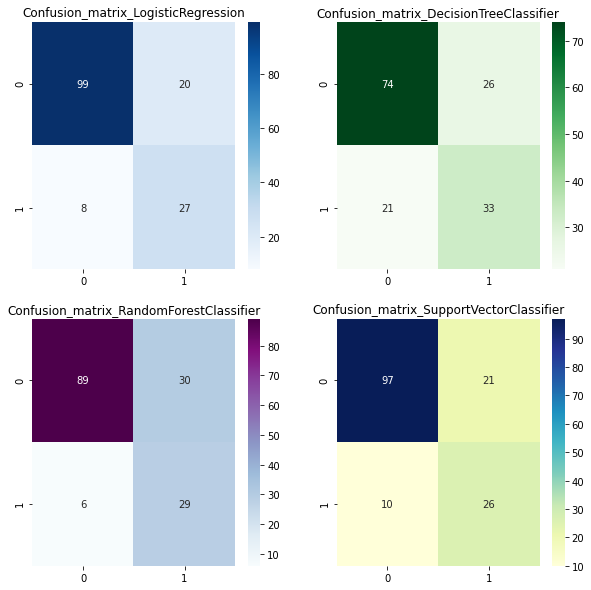

In [354]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.heatmap(con_mat_lr,annot=True,cmap="Blues")
plt.title("Confusion_matrix_LogisticRegression")
plt.subplot(2,2,2)
sns.heatmap(con_mat_dtc,annot=True,cmap="Greens")
plt.title("Confusion_matrix_DecisionTreeClassifier")
plt.subplot(2,2,3)
sns.heatmap(con_mat_rfc,annot=True,cmap="BuPu")
plt.title("Confusion_matrix_RandomForestClassifier")
plt.subplot(2,2,4)
sns.heatmap(con_mat_svc,annot=True,cmap="YlGnBu")
plt.title("Confusion_matrix_SupportVectorClassifier")

In [355]:
print("Accuracy of LogisticRegression",accuracy_score(ypred_lr,ytest_lr))
print("Accuracy of DecisionTreeClassifier",accuracy_score(ypred_dtc,ytest))
print("Accuracy of RandomForestClassifier",accuracy_score(ypred_rfc,ytest))
print("Accuracy of SupportVectorClassifier",accuracy_score(ypred_svc,ytest_lr))

Accuracy of LogisticRegression 0.8181818181818182
Accuracy of DecisionTreeClassifier 0.6948051948051948
Accuracy of RandomForestClassifier 0.7662337662337663
Accuracy of SupportVectorClassifier 0.7987012987012987


In [356]:
print(classification_report(ypred_lr,ytest_lr))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       119
           1       0.57      0.77      0.66        35

    accuracy                           0.82       154
   macro avg       0.75      0.80      0.77       154
weighted avg       0.85      0.82      0.83       154



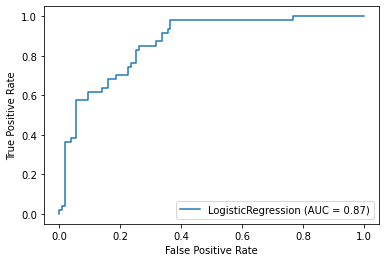

In [357]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, xtest_lr,ytest_lr)  
plt.show()                                   

In [358]:
print("Accuracy of LogisticRegression",accuracy_score(ypred_lr,ytest_lr))
print("Accuracy of DecisionTreeClassifier",accuracy_score(ypred_dtc,ytest))
print("Accuracy of RandomForestClassifier",accuracy_score(ypred_rfc,ytest))
print("Accuracy of SupportVectorClassifier",accuracy_score(ypred_svc,ytest_lr))

Accuracy of LogisticRegression 0.8181818181818182
Accuracy of DecisionTreeClassifier 0.6948051948051948
Accuracy of RandomForestClassifier 0.7662337662337663
Accuracy of SupportVectorClassifier 0.7987012987012987


In [359]:
# Manually Checking the prediction of Each Model

In [360]:
out1=lr.predict([[5,155,80,40,545,38,0.6,34]])
out2=dtc.predict([[5,155,80,40,545,38,0.6,34]])
out3=rfc.predict([[5,155,80,40,545,38,0.6,34]])
out4=svc.predict([[5,155,80,40,545,38,0.6,34]])

In [361]:
print("Actual Outcome:1","Predicted Value of LR:",out1)
print("Actual Outcome:1","Predicted Value of DTC:",out2)
print("Actual Outcome:1","Predicted Value of RFC:",out3)
print("Actual Outcome:1","Predicted Value of SVC:",out4)

Actual Outcome:1 Predicted Value of LR: [1]
Actual Outcome:1 Predicted Value of DTC: [0]
Actual Outcome:1 Predicted Value of RFC: [0]
Actual Outcome:1 Predicted Value of SVC: [1]
